### About Dataset

***Context-** 
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

**Objective** - 
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, roc_auc_score, roc_curve,confusion_matrix, ConfusionMatrixDisplay 
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from ydata_profiling import ProfileReport
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Calculate the average of non-missing values in the "Income" column
average_income = df["Income"].mean()
# Replace missing values in the "Income" column with the average
df["Income"].fillna(average_income, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [8]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [9]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [10]:
# Convert the 'date_column' to datetime dtype
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [12]:
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day

In [13]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,2014,8,4


In [14]:
df.drop("Dt_Customer",axis = 1, inplace=True)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,1,4,4,6,1,1,0,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,7,3,7,5,1,0,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,1,3,2,5,2,0,0,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,1,1,0,2,7,0,0,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,3,1,2,7,1,0,2014,8,4


In [15]:
New_df = df.copy()

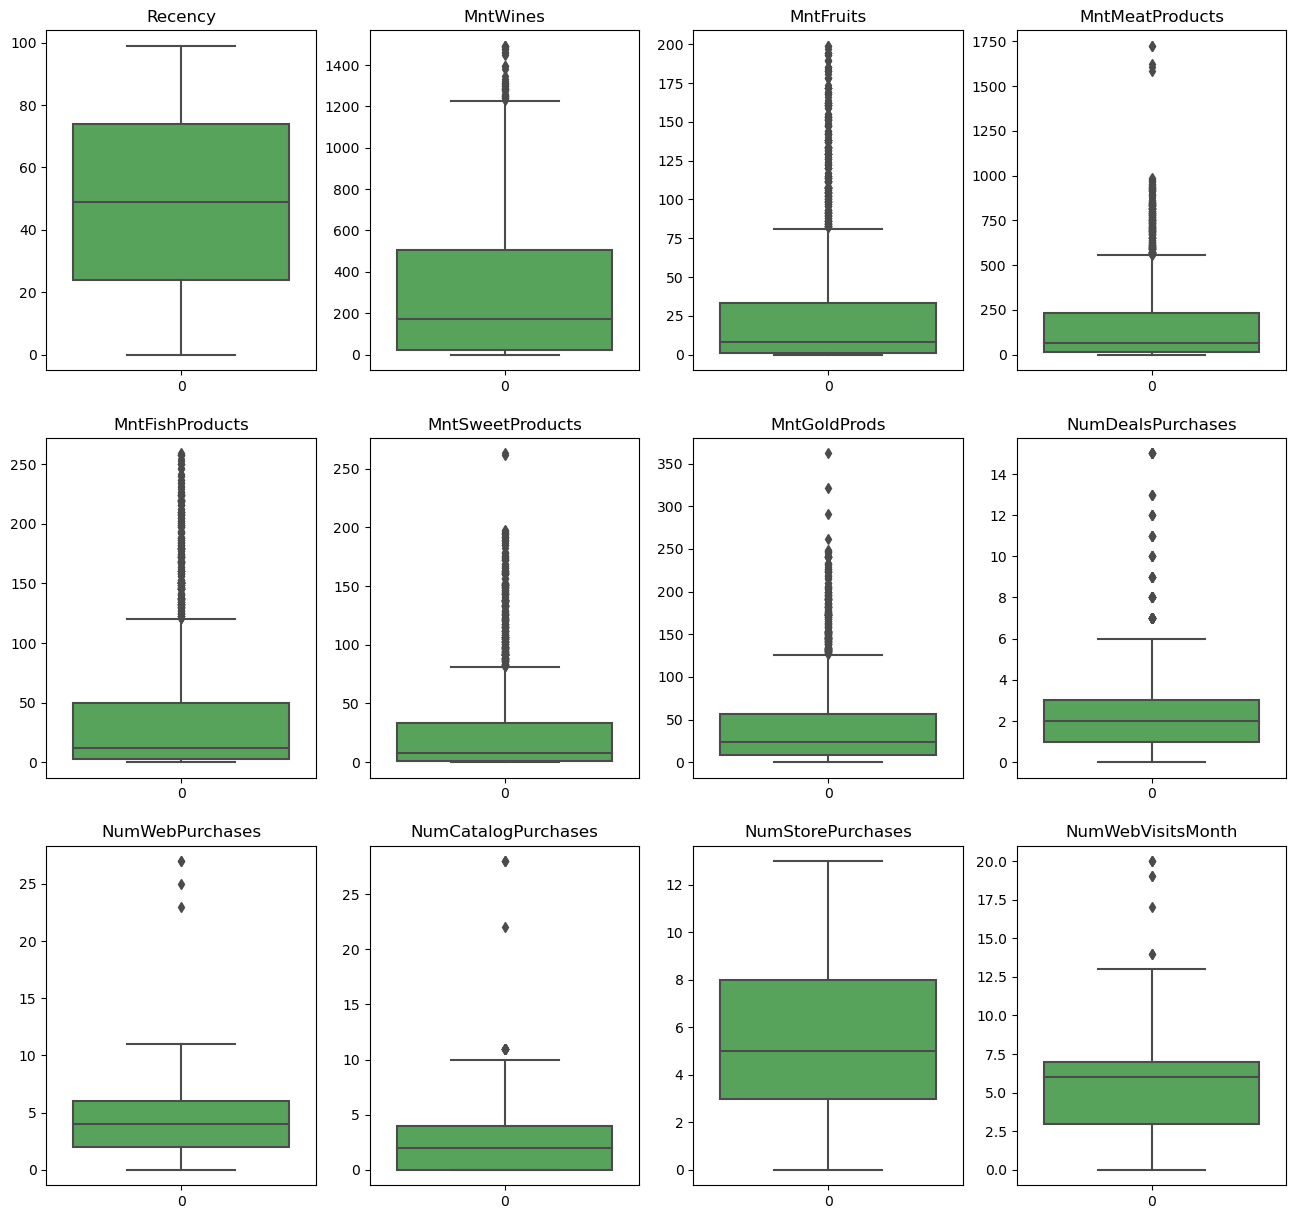

In [16]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(New_df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

In [17]:
column_name = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases','NumWebVisitsMonth']

# Function to calculate IQR and cap outliers
def cap_outliers(New_df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = New_df[column_name].quantile(0.25)
    Q3 = New_df[column_name].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Determine the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    # Cap outliers
    New_df[column_name] = np.where(New_df[column_name] < lower_bound, lower_bound, New_df[column_name])
    New_df[column_name] = np.where(New_df[column_name] > upper_bound, upper_bound, New_df[column_name])
    
    return df, lower_bound, upper_bound

# Cap outliers in the 'values' column
capped_df, lower_bound, upper_bound = cap_outliers(New_df, column_name)

#print("Original DataFrame:")
#print(pd.DataFrame(df))  # Print original data for comparison
#print("\nCapped DataFrame:")
print(capped_df)
print(f"\nLower bound for capping: {lower_bound}")
print(f"Upper bound for capping: {upper_bound}")

         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome  Recency  MntWines  MntFruits  ...  NumDealsPurchases  \
0            0        0       189        104  ...              

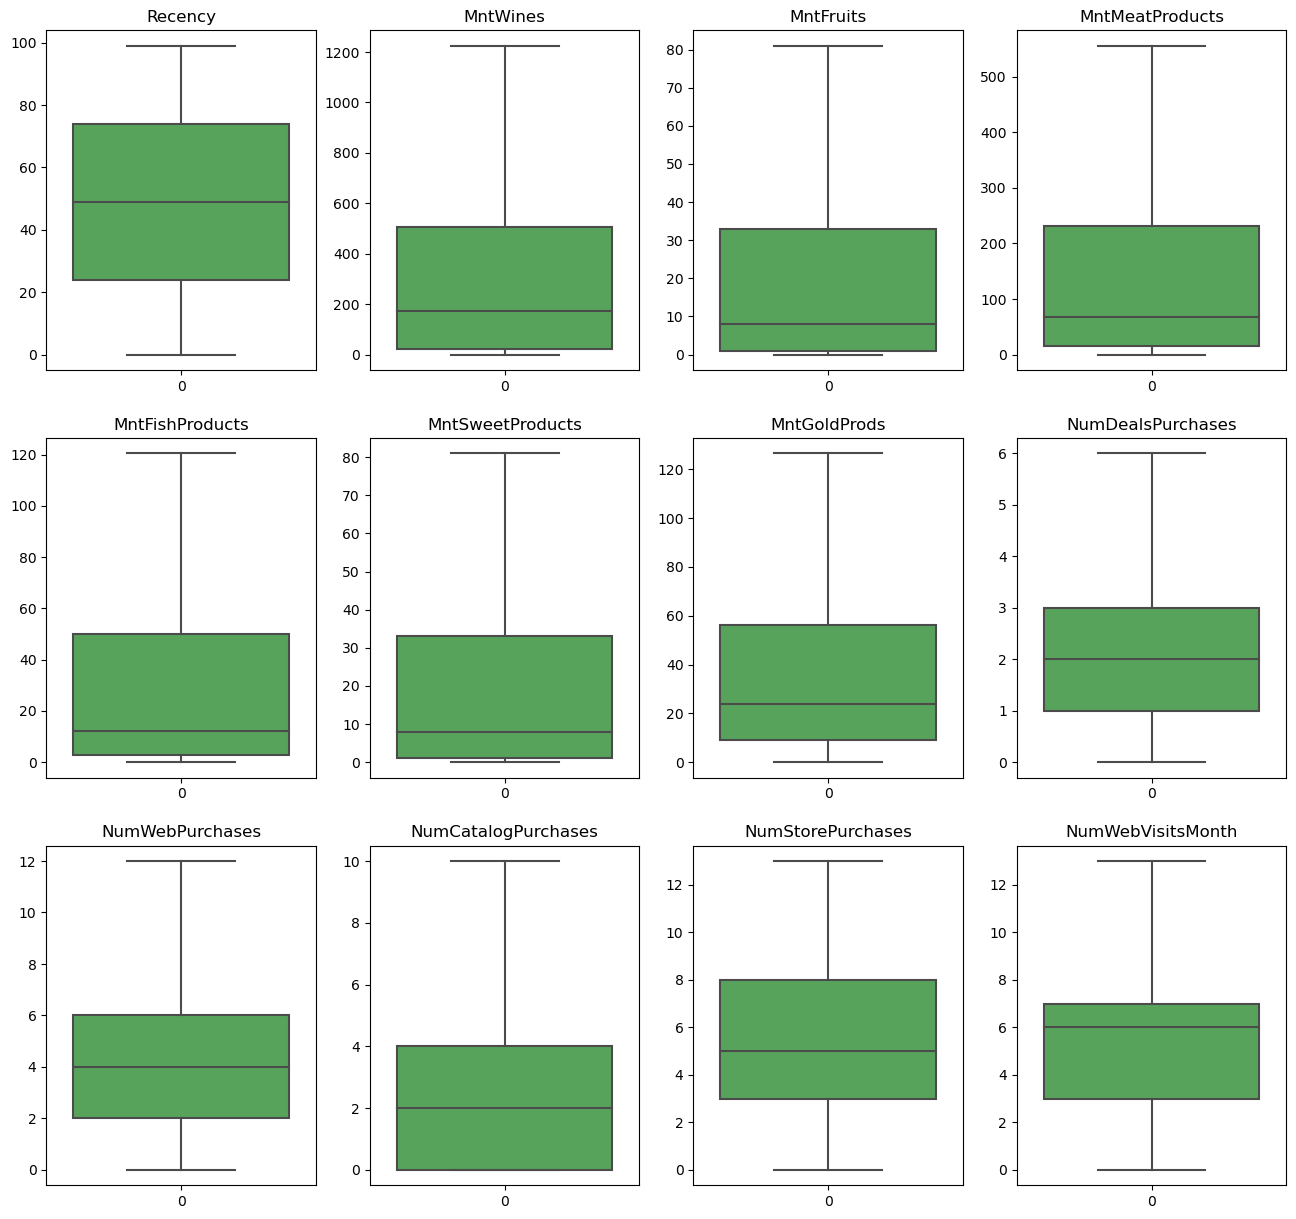

In [18]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(New_df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

In [19]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   float64
 9   MntFruits            2240 non-null   float64
 10  MntMeatProducts      2240 non-null   float64
 11  MntFishProducts      2240 non-null   float64
 12  MntSweetProducts     2240 non-null   float64
 13  MntGoldProds         2240 non-null   float64
 14  NumDealsPurchases    2240 non-null   float64
 15  NumWebPurchases      2240 non-null   f

In [20]:
New_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189.0,81.0,...,1.0,4.0,4.0,6,1.0,1,0,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,0,464.0,5.0,...,1.0,7.0,3.0,7,5.0,1,0,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,0,134.0,11.0,...,1.0,3.0,2.0,5,2.0,0,0,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,0,10.0,0.0,...,1.0,1.0,0.0,2,7.0,0,0,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,0,6.0,16.0,...,2.0,3.0,1.0,2,7.0,1,0,2014,8,4


In [21]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

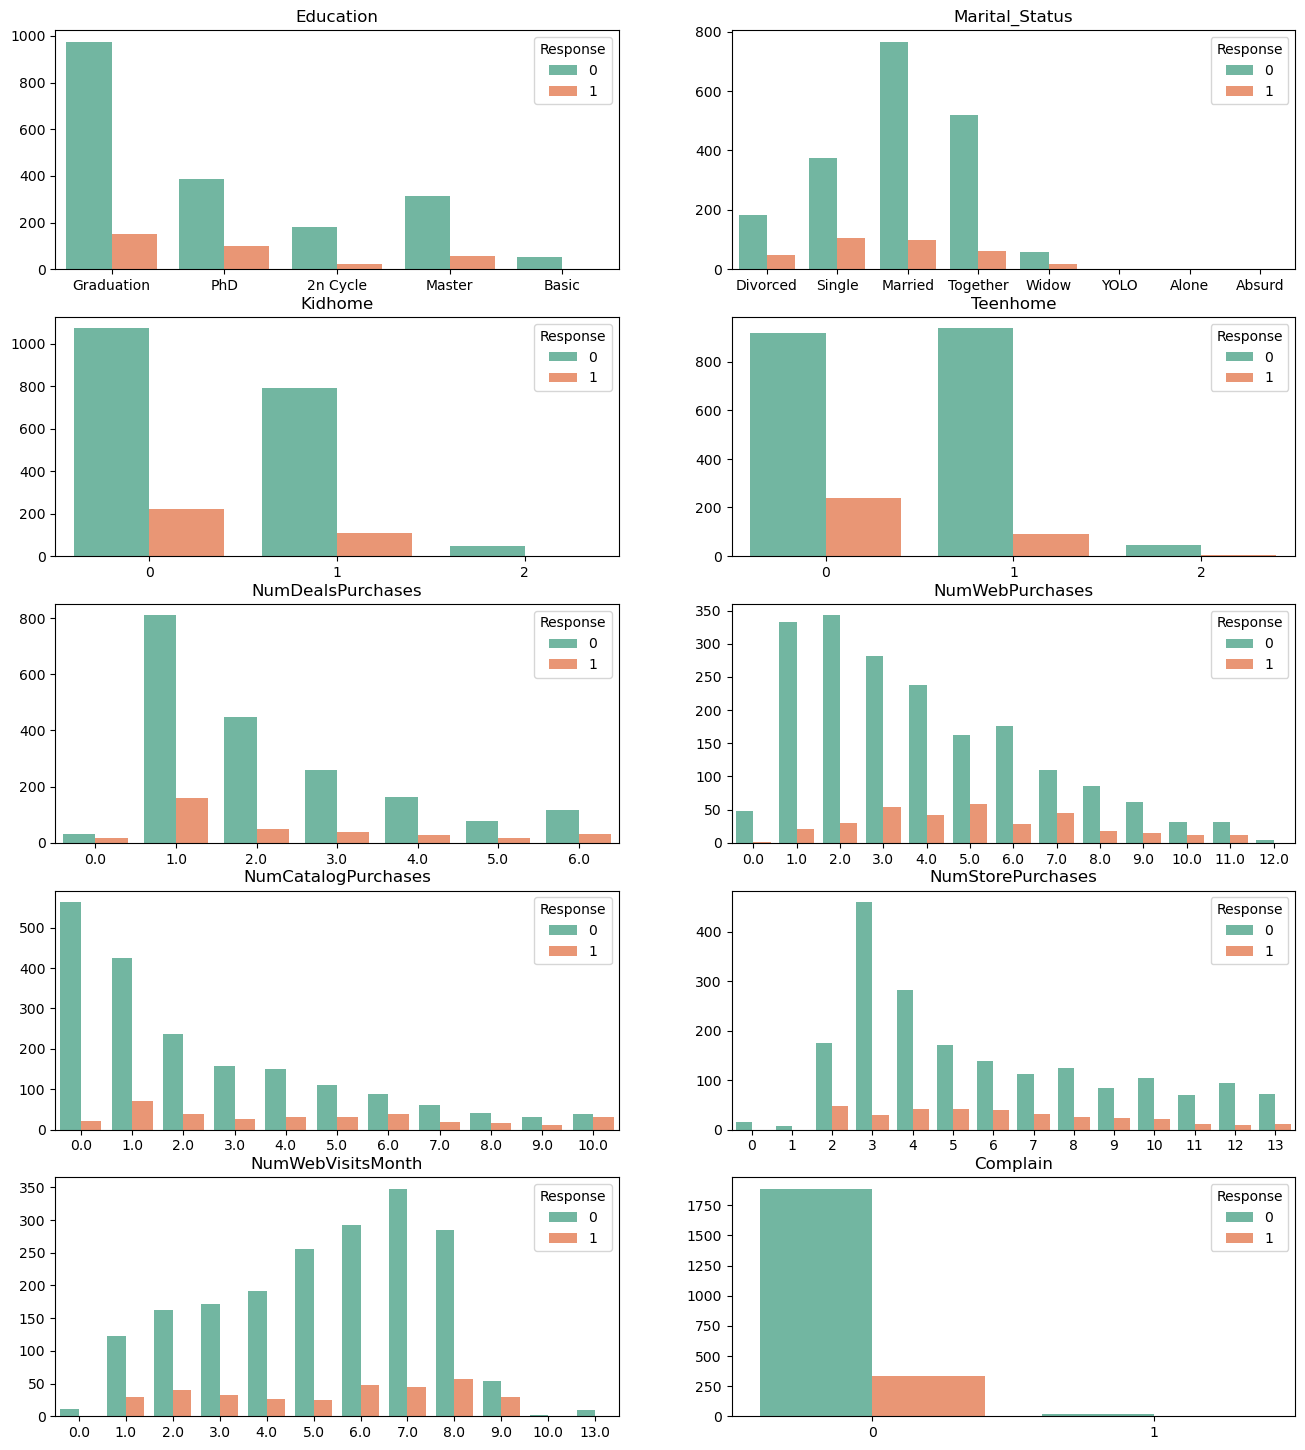

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(New_df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

In [23]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

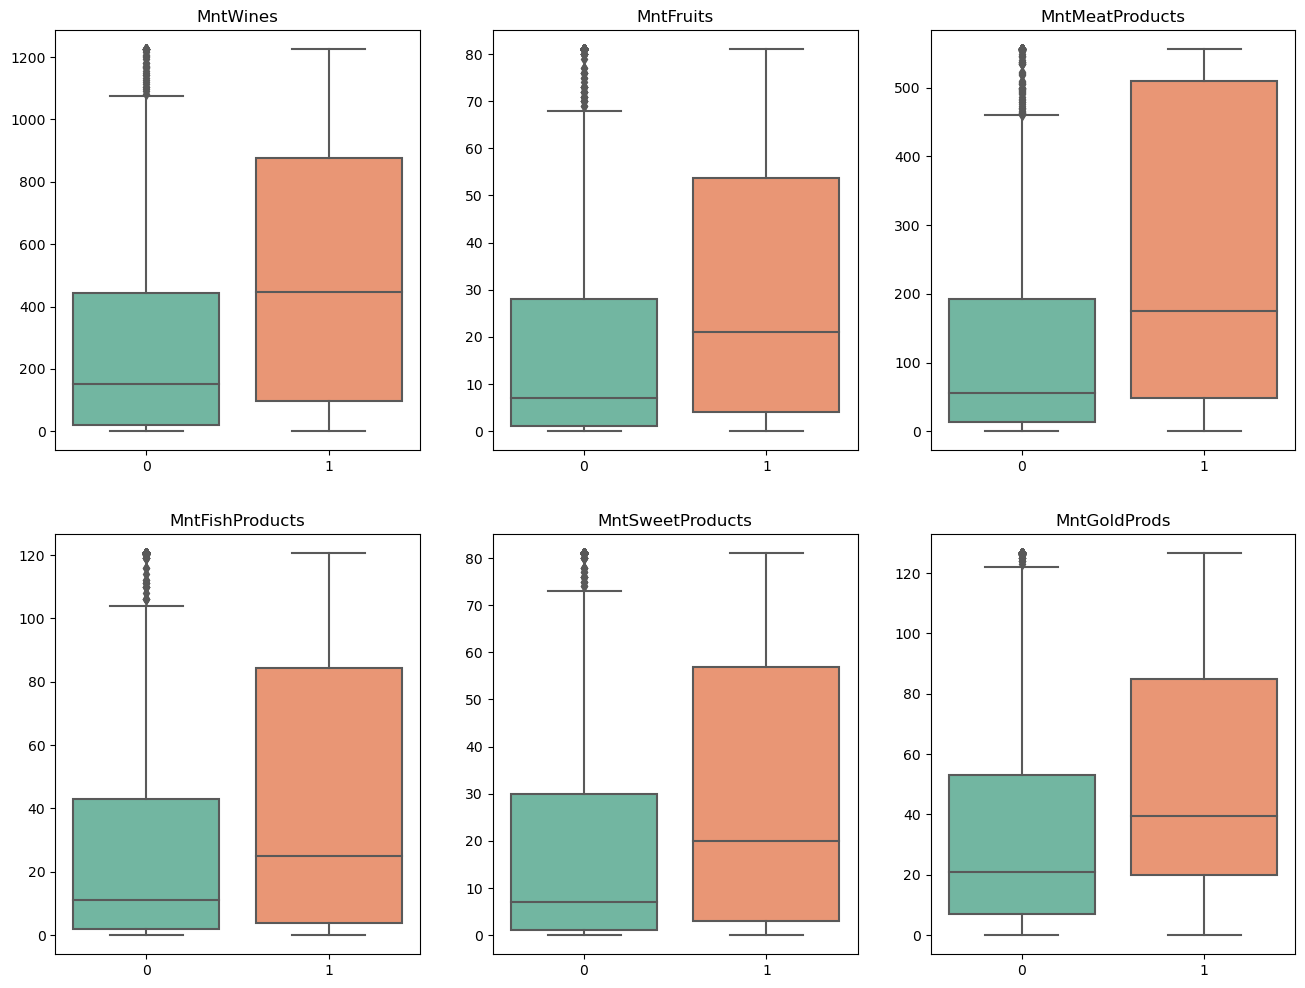

In [24]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(New_df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

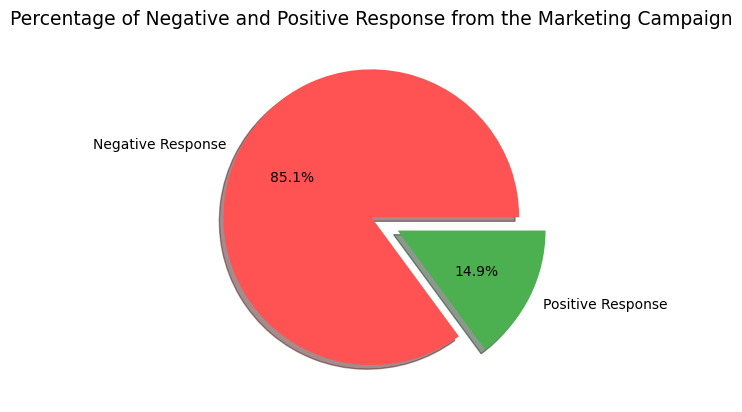

In [25]:
fig, ax = plt.subplots()

ax.pie(
    New_df.Response.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=13.5)

plt.show()

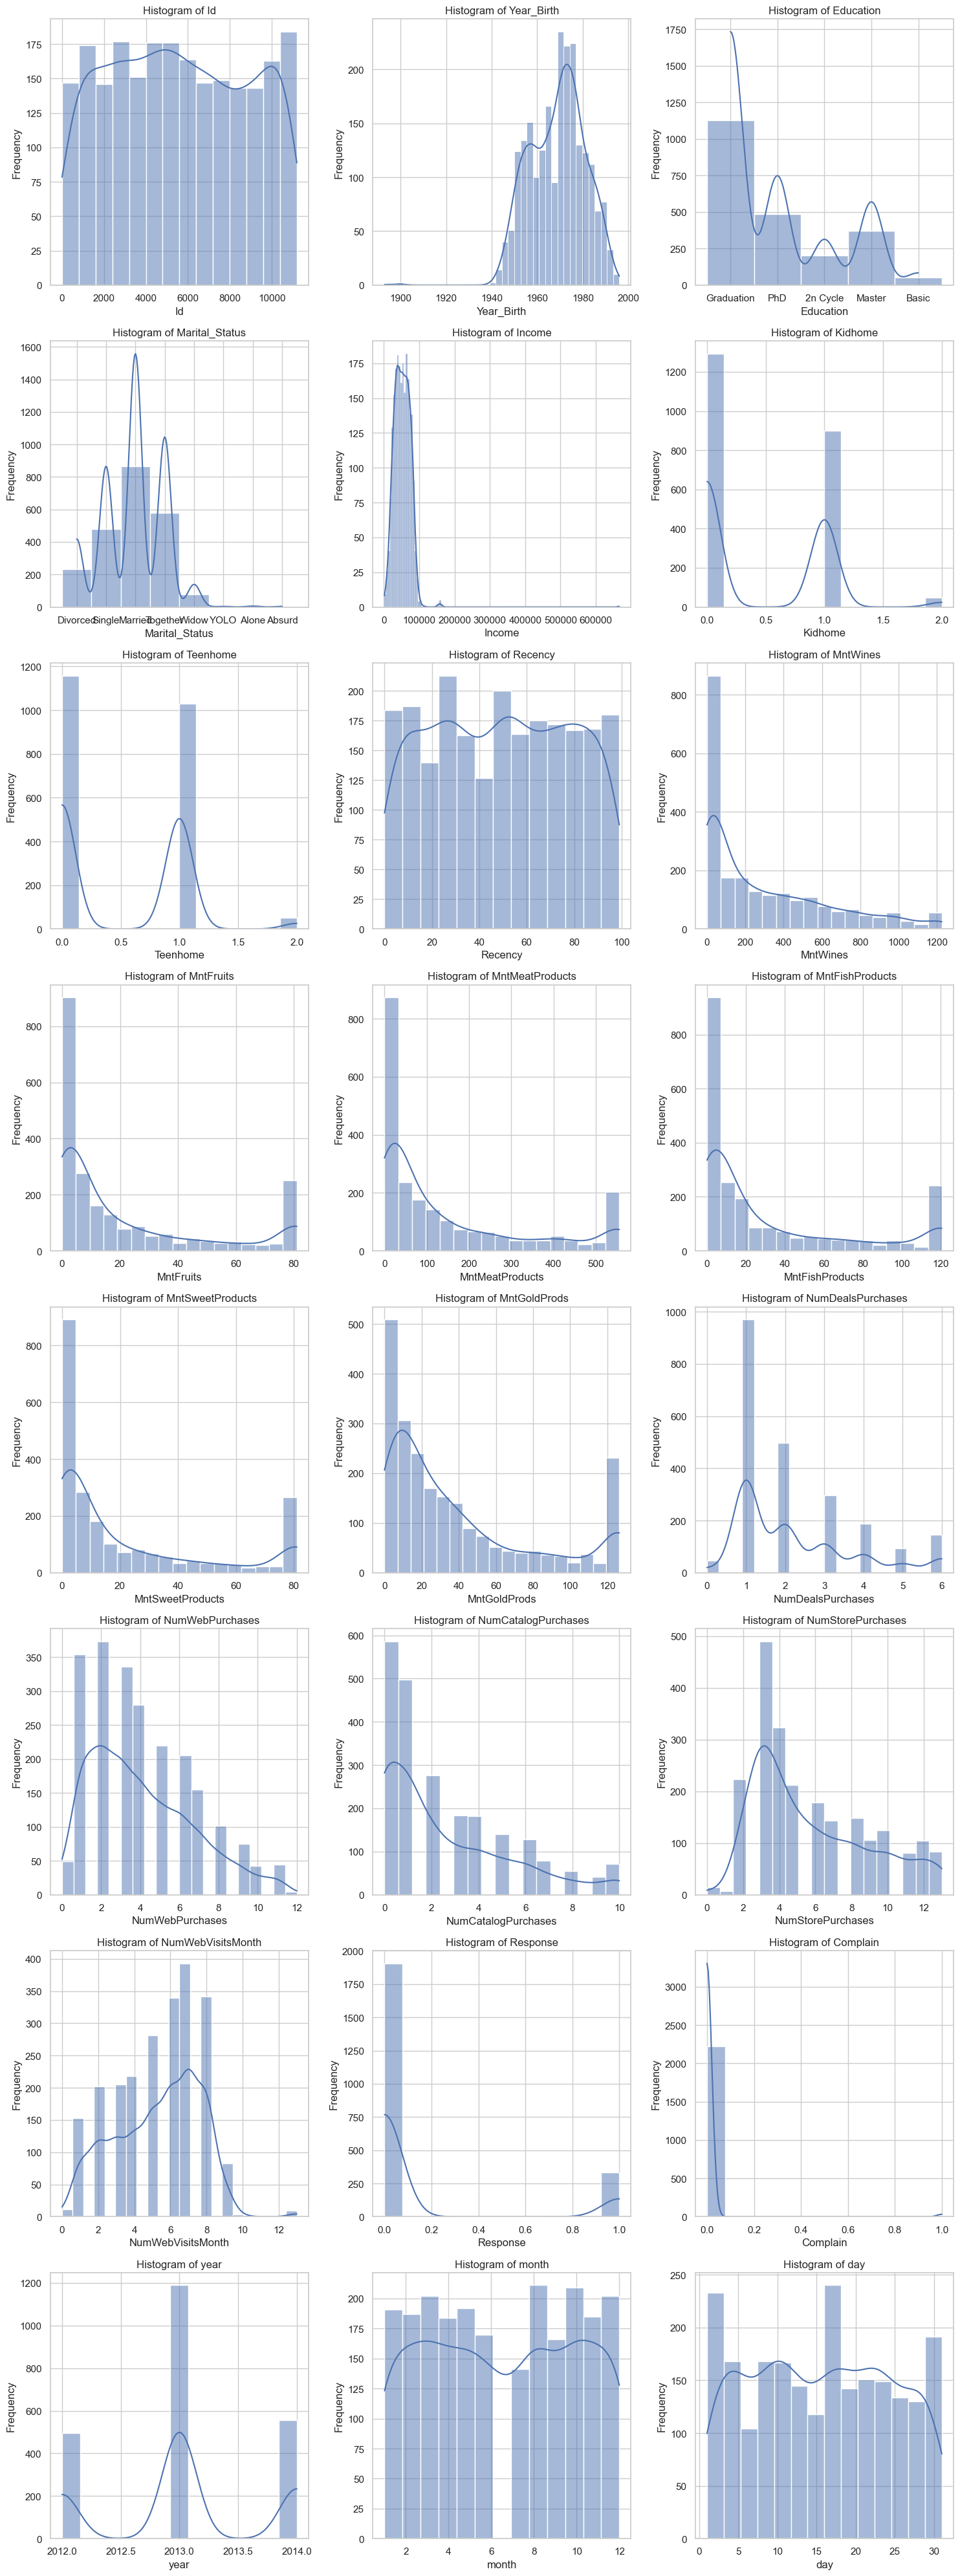

In [26]:
# Set the style
sns.set(style='whitegrid')

# Step 2: Select numeric columns
numeric_columns = New_df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + (1 if len(numeric_columns) % 3 > 0 else 0)
num_cols = min(3, len(numeric_columns))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()


# Plot histograms for each column
for i, column in enumerate(capped_df.columns):
    sns.histplot(New_df[column], ax=axes[i], kde=True)
    axes[i].set_title('Histogram of {}'.format(column))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Perform dummification on the "Education" and "Marital_Status" columns
dummified_df = pd.get_dummies(New_df, columns=["Education", "Marital_Status"])

# Convert boolean values to integers (1/0)
dummified_df = dummified_df.astype(int)

# Display the dummified DataFrame
dummified_df.head()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,84835,0,0,0,189,81,379,111,...,0,0,0,0,1,0,0,0,0,0
1,1,1961,57091,0,0,0,464,5,64,7,...,0,0,0,0,0,0,1,0,0,0
2,10476,1958,67267,0,1,0,134,11,59,15,...,0,0,0,0,0,1,0,0,0,0
3,1386,1967,32474,1,1,0,10,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5371,1989,21474,1,0,0,6,16,24,11,...,0,0,0,0,0,0,1,0,0,0


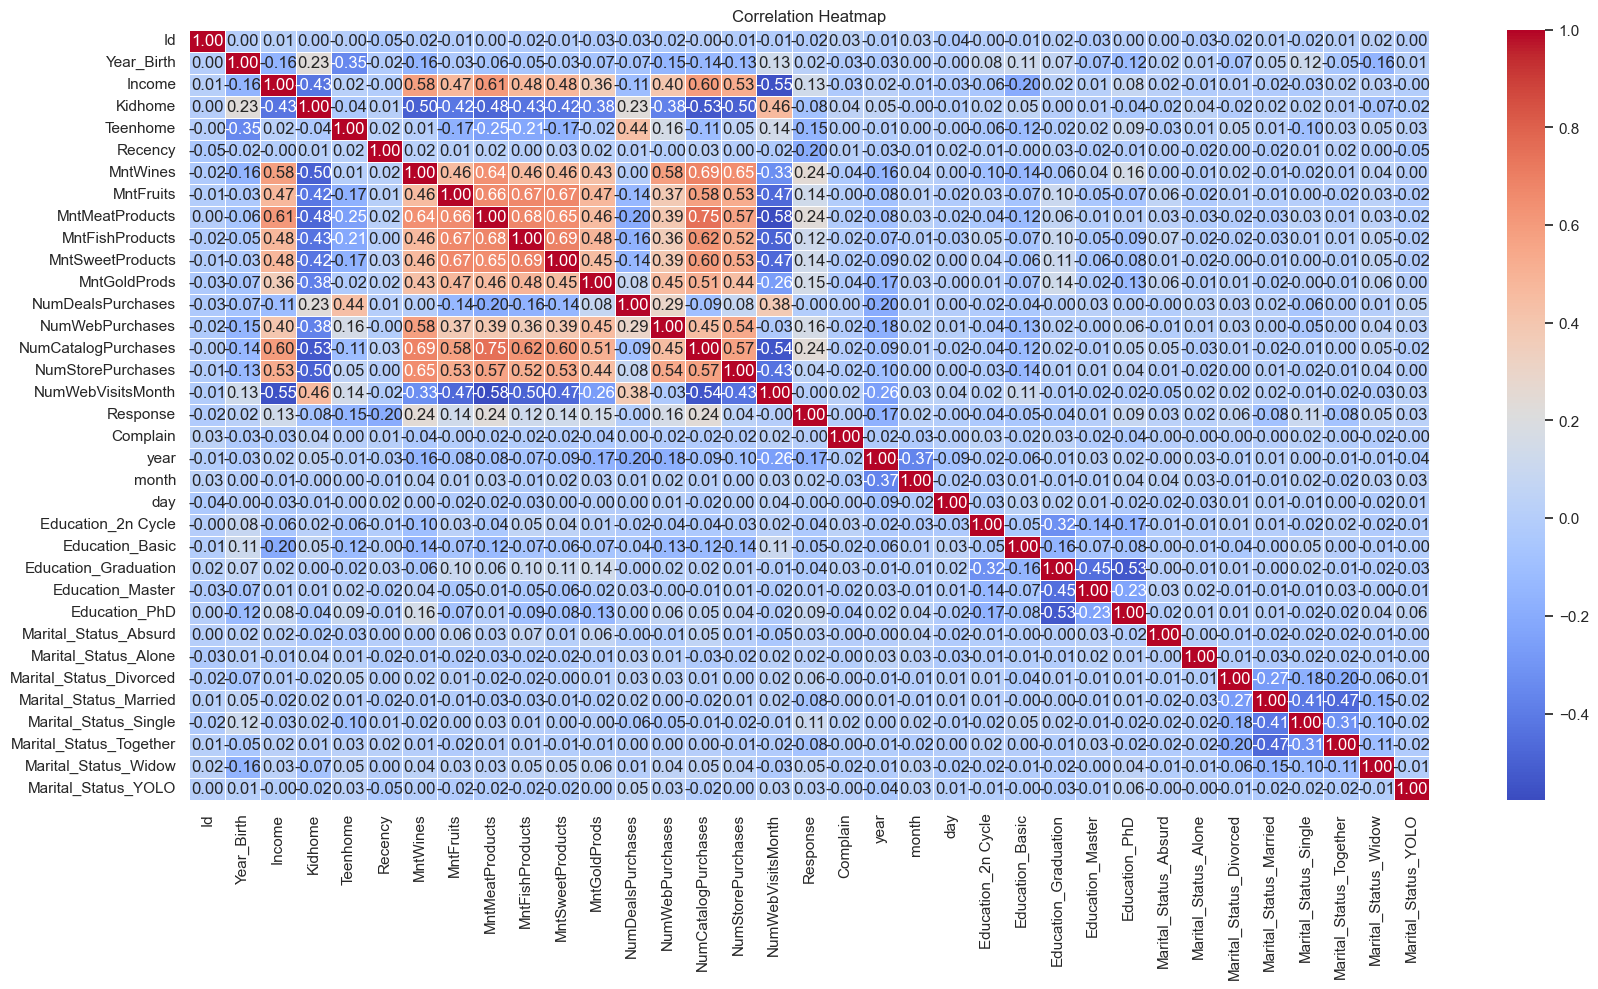

<Figure size 640x480 with 0 Axes>

In [28]:
# Calculate the correlation matrix
correlation_matrix =dummified_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

### Splitting of the Data  into X and y


In [29]:
X = dummified_df.drop('Response', axis=1)
y = dummified_df.Response

X.shape, y.shape

((2240, 34), (2240,))

### Oversampling

In [30]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X,y)

X_resampled.shape, y_resampled.shape

((3812, 34), (3812,))

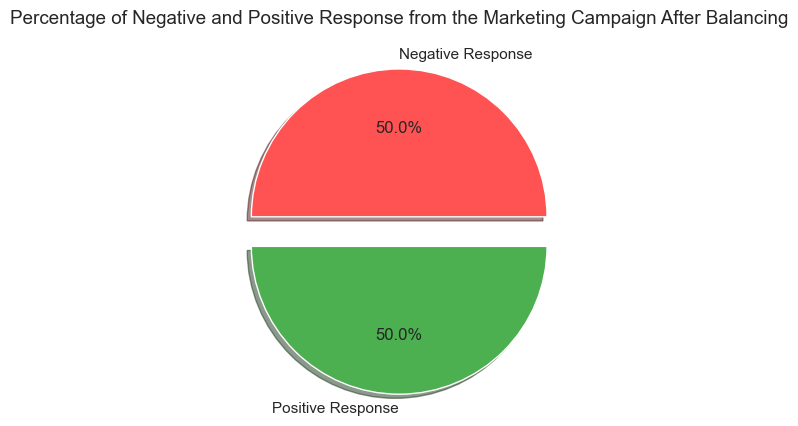

In [75]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

#Save the image below
plt.savefig("Percentage of Negative and Positive Response.png",dpi = 300,bbox_inches ="tight")

plt.show()

### Spliting our Dataset into Train and test

In [32]:
np.random.seed(42)
 
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3049, 34), (763, 34), (3049,), (763,))

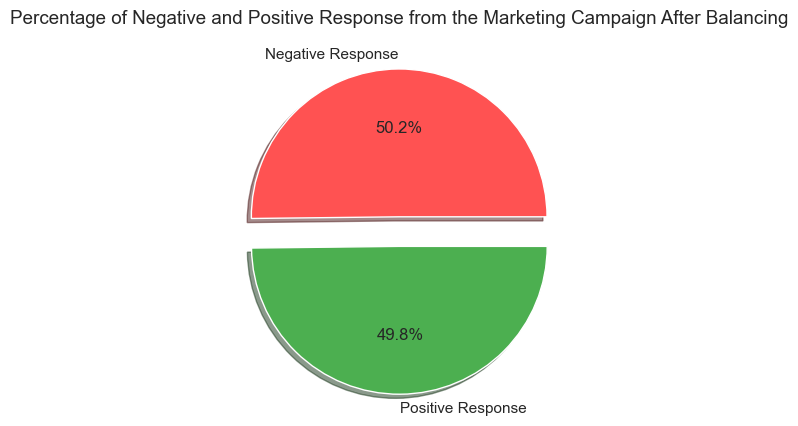

In [33]:
fig, ax = plt.subplots()

ax.pie(
    y_train.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

plt.show()

### Standardization

In [34]:
scaler = StandardScaler()
# Fit and transform the DataFrame
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train.shape,y_train.shape

((3049, 34), (3049,))

### Modeling and Evaluation

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [36]:
# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return metric_dict

### Logistic Regression

In [37]:
#Define model
Lr_model= LogisticRegression()

#Fit the model
Lr_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [38]:
Lr_y_preds = Lr_model.predict(scaled_X_test)

#Evaluate the prediction
Lr_metrics =evaluate_preds(y_test,Lr_y_preds)

Accuracy:79.55%
Precision:0.80
Recall:0.80
F1 Score: 0.80


### Visualization of the Confusion Metrix of Logistic Regression

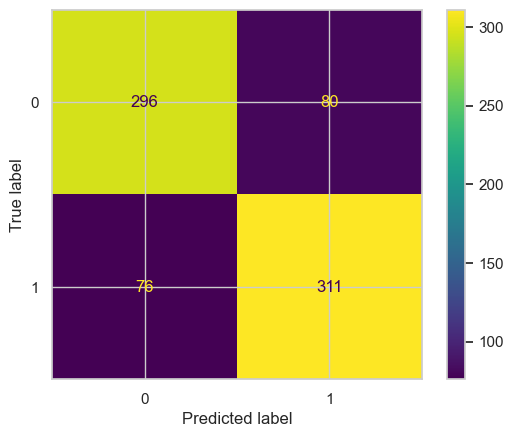

In [39]:
ConfusionMatrixDisplay.from_estimator(estimator =Lr_model , X = scaled_X_test, y = y_test);

#### Tuning on Logistic Regression 

In [40]:
lr_params = {
    "penalty": ['l1', 'l2'],
    "C": [0.01, 0.1, 1, 10],
    "solver": ['saga', 'liblinear']
}

gs_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000),
    param_grid=lr_params,
    scoring='accuracy',
    cv=kf
)

gs_lr.fit(scaled_X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

In [41]:
#Make prediction with the best hyperparameters
gs_lr_y_preds =gs_lr.predict(scaled_X_test)

#Evaluate the prediction
gs_lr_metrics =evaluate_preds(y_test,gs_lr_y_preds)

Accuracy:79.55%
Precision:0.80
Recall:0.80
F1 Score: 0.80


##### Confusion Metrics Visualization

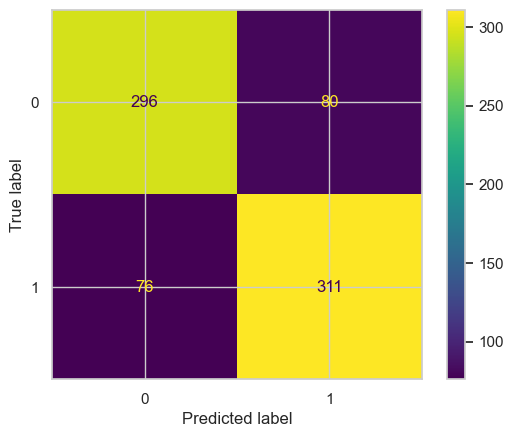

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator =gs_lr ,X = scaled_X_test, y = y_test);

### Random forest classifier

In [43]:
np.random.seed(42)
#Define model
Rf_model= RandomForestClassifier()

#Fit the model
Rf_model.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [44]:
#Make prediction with the best hyperparameters
Rf_y_preds = Rf_model.predict(scaled_X_test)

#Evaluate the prediction
Rf_metrics =evaluate_preds(y_test,Rf_y_preds)

Accuracy:97.12%
Precision:0.97
Recall:0.97
F1 Score: 0.97


### Visualization of the Confusion Metrix for Random Forest

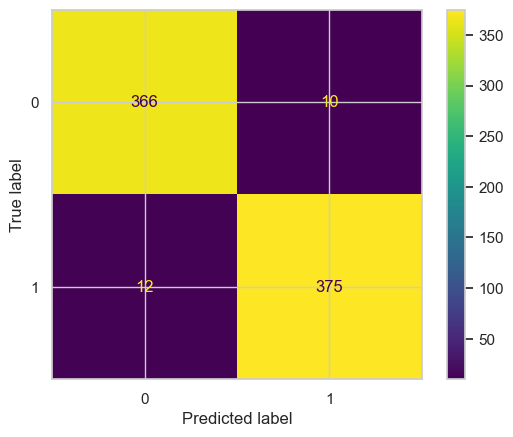

In [45]:
ConfusionMatrixDisplay.from_estimator(estimator =Rf_model ,X = scaled_X_test, y = y_test);

#### Tuning on RandomForest Classifier 

In [46]:
rf_params = {
    'n_estimators': [100,200,300],
    'max_features': ['auto','sqrt'],
    'max_depth': [10, 20,],
    'min_samples_split': [2,4,6,],
    'min_samples_leaf': [2,4,6,],
    'bootstrap': [True, False]}

gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=3),
    param_grid=rf_params,
    scoring='accuracy',
    cv=kf
)

gs_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=3),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [47]:
#Make prediction with the best hyperparameters
gs_rf_y_preds = gs_rf.predict(scaled_X_test)

#Evaluate the prediction
gs_rf_metrics =evaluate_preds(y_test,gs_rf_y_preds)

Accuracy:95.81%
Precision:0.97
Recall:0.95
F1 Score: 0.96


##### Confusion Metrics Visualization

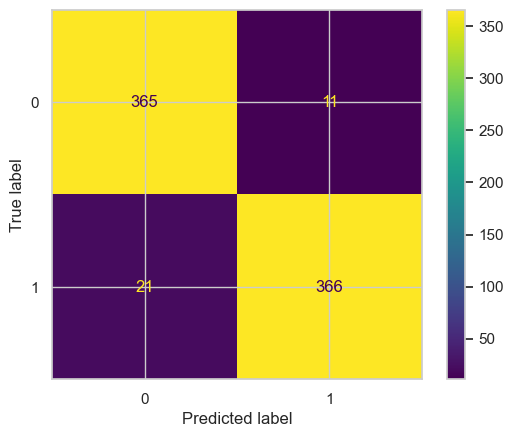

In [48]:
ConfusionMatrixDisplay.from_estimator(estimator =gs_rf, X = scaled_X_test, y = y_test);

### Decision Tree Classifier

In [49]:
#Define model
Dtc = tree.DecisionTreeClassifier()

#Fit the model
Dtc.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [50]:
#Make prediction with the best hyperparameters
Dtc_y_preds =Dtc.predict(scaled_X_test)

#Evaluate the prediction
Dtc_metrics =evaluate_preds(y_test,Rf_y_preds)

Accuracy:97.12%
Precision:0.97
Recall:0.97
F1 Score: 0.97


### Visualization of the Confusion Metrix for Decision Tress classifier

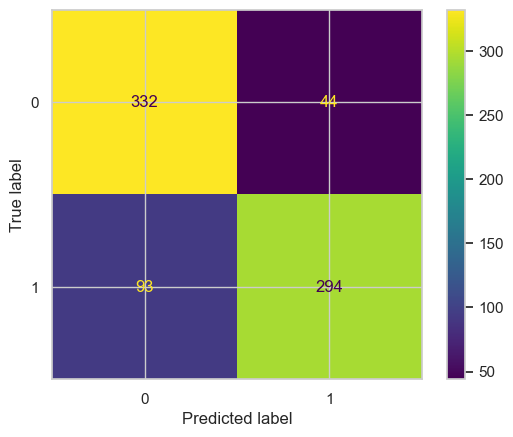

In [51]:
ConfusionMatrixDisplay.from_estimator(estimator =Dtc, X = scaled_X_test, y = y_test);

#### Tuning on Decision Tree Classifier

In [52]:
tree_params = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': [2, 3, 5]
}

dtc_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tree_params,
    scoring='accuracy',
    cv=kf
)

dtc_tree.fit(scaled_X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [53]:
#Make prediction with the best hyperparameters
Dtc_y_preds =Dtc.predict(scaled_X_test)

#Evaluate the prediction
GS_Dtc_metrics =evaluate_preds(y_test,Rf_y_preds)

Accuracy:97.12%
Precision:0.97
Recall:0.97
F1 Score: 0.97


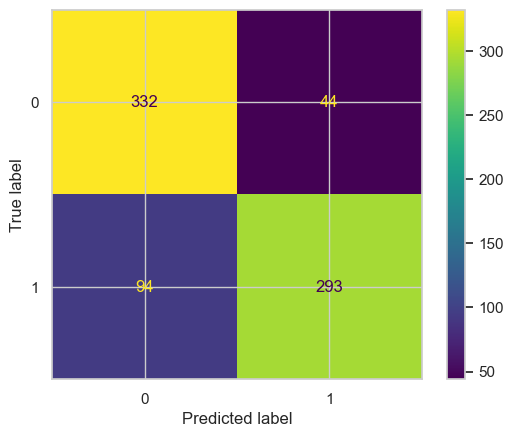

In [54]:
ConfusionMatrixDisplay.from_estimator(estimator =dtc_tree, X = scaled_X_test, y = y_test);

### KNN

In [55]:
#Define model
neigh = KNeighborsClassifier(n_neighbors=3)

#Fit the model
neigh.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
#Make prediction with the best hyperparameters
neigh_y_preds =neigh.predict(scaled_X_test)

#Evaluate the prediction
neigh_metrics =evaluate_preds(y_test,neigh_y_preds)

Accuracy:88.73%
Precision:0.84
Recall:0.96
F1 Score: 0.90


### Visualization of the Confusion Metrix for KNeighborsClassifier

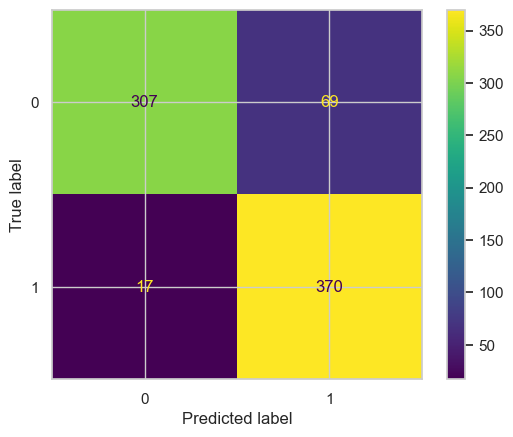

In [57]:
ConfusionMatrixDisplay.from_estimator(estimator =neigh, X = scaled_X_test, y = y_test);

#### Tuning on KNN

In [58]:
knn_params = {
    "n_neighbors": [3, 5, 10],
    "weights": ['uniform', 'distance']
}

gs_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
#Make prediction with the best hyperparameters
gs_knn_y_preds =gs_knn.predict(scaled_X_test)

#Evaluate the prediction
gs_knn_metrics =evaluate_preds(y_test,gs_knn_y_preds)

Accuracy:49.28%
Precision:0.00
Recall:0.00
F1 Score: 0.00


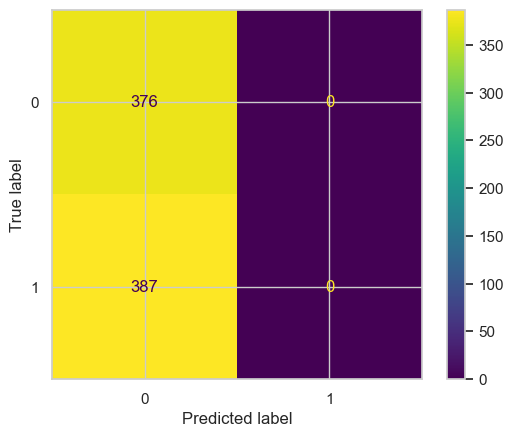

In [60]:
ConfusionMatrixDisplay.from_estimator(estimator =gs_knn, X = scaled_X_test, y = y_test);

### XGBClassifier

In [61]:
np.random.seed(42)
 
#Define model
Xgb_model = XGBClassifier()
 
#Fit model
Xgb_model.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
#Make prediction with the best hyperparameters
Xgb_y_preds =Xgb_model.predict(scaled_X_test)

#Evaluate the prediction
Xgb_metrics =evaluate_preds(y_test,Xgb_y_preds)

Accuracy:82.44%
Precision:0.90
Recall:0.73
F1 Score: 0.81


### Visualization of the Confusion Metrix for XGBClassifier

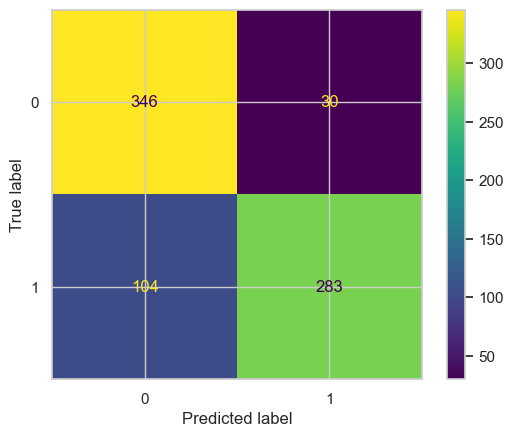

In [63]:
ConfusionMatrixDisplay.from_estimator(estimator =Xgb_model, X = scaled_X_test, y = y_test);

#### Tuned XGBClassifier

In [64]:
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define parameters grid
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create GridSearchCV object
gs_Xgb_model_2 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs=10,
    cv=10,
    verbose=True
)

# Fit the model
gs_Xgb_model_2.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             verbose=True)

In [65]:
#Make prediction with the best hyperparameters
gs_Xgb_y_preds =Xgb_model.predict(scaled_X_test)

#Evaluate the prediction
gs_Xgb_metrics =evaluate_preds(y_test,gs_Xgb_y_preds)

Accuracy:82.44%
Precision:0.90
Recall:0.73
F1 Score: 0.81


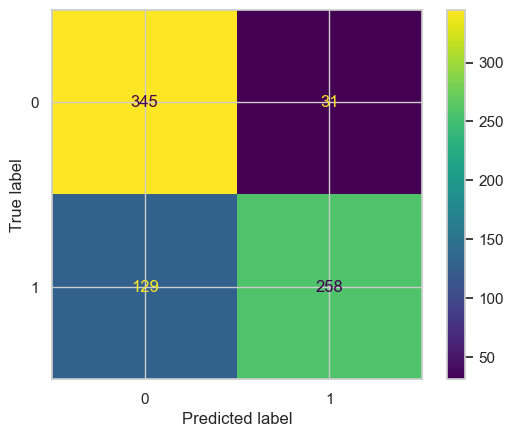

In [66]:
ConfusionMatrixDisplay.from_estimator(estimator =gs_Xgb_model_2, X = scaled_X_test, y = y_test);

### SVM

In [67]:
#Define model

svm_model = svm.SVC()

#Fit in Model
svm_model.fit(scaled_X_train, y_train)

SVC()

In [68]:
#Make prediction with the best hyperparameters
svm_y_preds =svm_model.predict(scaled_X_test)

#Evaluate the prediction
svm_metrics =evaluate_preds(y_test,svm_y_preds)

Accuracy:88.99%
Precision:0.85
Recall:0.94
F1 Score: 0.90


### Visualization of the Confusion Metrix for SVM

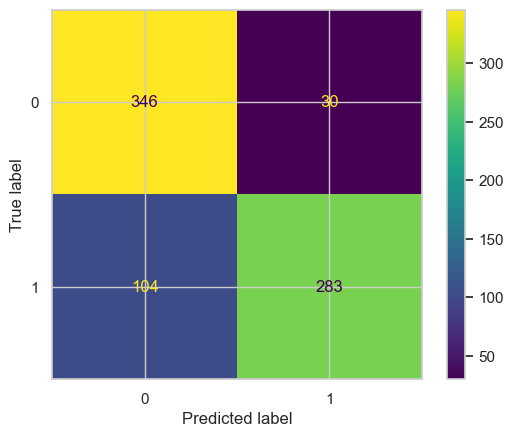

In [69]:
ConfusionMatrixDisplay.from_estimator(estimator =Xgb_model, X = scaled_X_test, y = y_test);

##### Tuning on SVM

In [70]:
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "gamma": ['scale', 'auto']
}

gs_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_params,
    scoring='accuracy',
    cv=kf
)

gs_svc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [71]:
#Make prediction with the best hyperparameters
gs_svc_y_preds =gs_svc.predict(scaled_X_test)

#Evaluate the prediction
gs_svc_metrics =evaluate_preds(y_test,gs_svc_y_preds)

Accuracy:49.28%
Precision:0.00
Recall:0.00
F1 Score: 0.00


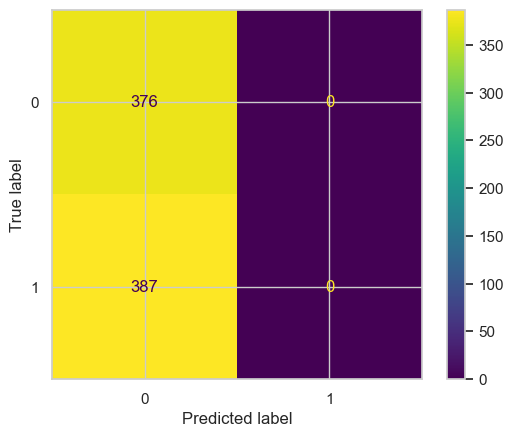

In [72]:
ConfusionMatrixDisplay.from_estimator(estimator =gs_svc, X = scaled_X_test, y = y_test);

### Comparism of the Models

In [73]:
compare_matrics = pd.DataFrame({'baseline_LR': Lr_metrics,
                                'GridTuned_LR':gs_lr_metrics,
                                'baseline_RF': Rf_metrics,
                                'GridTuned_RF':gs_rf_metrics,
                                'baseline_XGB': Xgb_metrics,
                                'Gridtuned_XGB_res':gs_Xgb_metrics,
                                'baseline_Svc': svm_metrics,
                                'Gridtuned_Svc': gs_svc_metrics,
                                'baseline_KNN': neigh_metrics,
                                'Gridtuned_KNN': gs_knn_metrics,
                                'baseline_DecisionT':Dtc_metrics,
                                'Gridtuned_DecisionT':GS_Dtc_metrics,})
compare_matrics

,baseline_LR,GridTuned_LR,baseline_RF,GridTuned_RF,baseline_XGB,Gridtuned_XGB_res,baseline_Svc,Gridtuned_Svc,baseline_KNN,Gridtuned_KNN,baseline_DecisionT,Gridtuned_DecisionT
accuracy,0.8,0.8,0.97,0.96,0.82,0.82,0.89,0.49,0.89,0.49,0.97,0.97
precision,0.8,0.8,0.97,0.97,0.90,0.90,0.85,0.00,0.84,0.00,0.97,0.97
recall,0.8,0.8,0.97,0.95,0.73,0.73,0.94,0.00,0.96,0.00,0.97,0.97
f1,0.8,0.8,0.97,0.96,0.81,0.81,0.90,0.00,0.90,0.00,0.97,0.97


### Saving the best Model

In [74]:
#save an existing model to file
pickle.dump(gs_rf, open('RandomForest Classification.pkl', 'wb'))

### Conclusion

**Logistic Regression:** No improvement was observed with hyperparameter tuning; both baseline and grid-tuned models have identical performance across all metrics.

**Random Forest:** The baseline model has slightly better performance than the grid-tuned model. The slight decrease in recall for the grid-tuned model leads to a marginal reduction in accuracy and F1-score.

**XGBoost:**  No improvement was observed with hyperparameter tuning; both baseline and grid-tuned models have identical performance across all metrics.

**Support Vector Classifier:** The grid-tuned model performed significantly worse than the baseline model, indicating a poor choice of hyperparameters.

**K-Nearest Neighbors:** Similar to the SVC, the grid-tuned model performed significantly worse than the baseline model, indicating a poor choice of hyperparameters.
Decision Tree: No improvement was observed with hyperparameter tuning; both baseline and grid-tuned models have identical performance across all metrics.

**Recommendation:**
Hyperparameter tuning did not significantly improve the performance of most models, and in some cases (SVC and KNN), it significantly worsened the performance.
Random Forest and Decision Tree models show strong performance with high accuracy, precision, recall, and F1 scores, even without tuning.

